In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wandb_df = pd.read_csv("wandb_exports.csv")
wandb_df.head()

,Name,Created,End Time,Runtime,State,Sweep,data,Tags,epoch,val_metric,...,dec_dropout,dec_heads,dec_layers,enc_heads,enc_layers,dec_pf_dim,enc_pf_dim,learning_rate,error_tag,trainable_parameters
0,clear-sweep-62,2023-03-07T01:01:43.000Z,2023-03-07T04:14:24.000Z,11561,finished,cycheugx,../repetition_data_generation/data/rep_audio.csv,NaN,30,f1,...,0.035961,2,5,8,4,80,40,0.001929,"[""RB2"",""RI2""]",2069992
1,super-sweep-61,2023-03-06T21:35:29.000Z,2023-03-07T01:01:20.000Z,12351,finished,cycheugx,../repetition_data_generation/data/rep_audio.csv,NaN,31,f1,...,0.038478,4,3,10,5,160,40,0.001025,"[""RB2"",""RI2""]",2838648
2,vibrant-sweep-60,2023-03-06T17:38:57.000Z,2023-03-06T21:35:10.000Z,14173,finished,cycheugx,../repetition_data_generation/data/rep_audio.csv,NaN,56,f1,...,0.038308,4,2,6,3,200,120,0.001785,"[""RB2"",""RI2""]",992824
3,proud-sweep-59,2023-03-06T14:57:20.000Z,2023-03-06T17:38:32.000Z,9672,finished,cycheugx,../repetition_data_generation/data/rep_audio.csv,NaN,31,f1,...,0.048948,4,4,2,4,120,40,0.002325,"[""RB2"",""RI2""]",481432
4,amber-sweep-58,2023-03-06T08:46:45.000Z,2023-03-07T01:23:47.000Z,59822,finished,cycheugx,../repetition_data_generation/data/rep_audio.csv,NaN,255,f1,...,0.034685,2,3,8,2,160,80,0.000651,"[""RB2"",""RI2""]",915688


In [28]:
# Print all unitque values in the "model" column
print(wandb_df["error_tag"].unique())

# Replace all rows where the error_tag matches the style "["ERROR_TAG"]" with "ERROR_TAG"
# This is so that we can plot the data
wandb_df["error_tag"] = wandb_df["error_tag"].str.replace(r"\[|\]", "").str.strip("\"")

# Replace all rows where the error tag is S with SUB. This needs to be when the tag as a whole is S
wandb_df["error_tag"] = wandb_df["error_tag"].str.replace(r"\bS\b", "SUB")


# Print all unitque values in the "model" column
print(wandb_df["error_tag"].unique())



['["-"]' '["SUB"]' '["RB2","RI2"]' 'SUB' '-' 'S' nan]
['-' 'SUB' 'RB2","RI2' nan]


/var/folders/v1/y50fhq4d5g5bzjysgkkts17h0000gn/T/ipykernel_10849/2007825810.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  wandb_df["error_tag"] = wandb_df["error_tag"].str.replace(r"\[|\]", "").str.strip("\"")
/var/folders/v1/y50fhq4d5g5bzjysgkkts17h0000gn/T/ipykernel_10849/2007825810.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  wandb_df["error_tag"] = wandb_df["error_tag"].str.replace(r"\bS\b", "SUB")


In [17]:
# So create a model_type column that is based on the data column. If it ends in sub_audio.csv, then it is substitution, if it ends in rep_audio.csv, then it is repetition, and if it ends in del_audio.csv, then it is deletion
wandb_df["model_type"] = wandb_df["data"].str.split("/").str[-1].str.split("_").str[0]

# Print all unitque values in the "model" column
print(wandb_df["model_type"].unique())

['rep' 'sub' 'del']


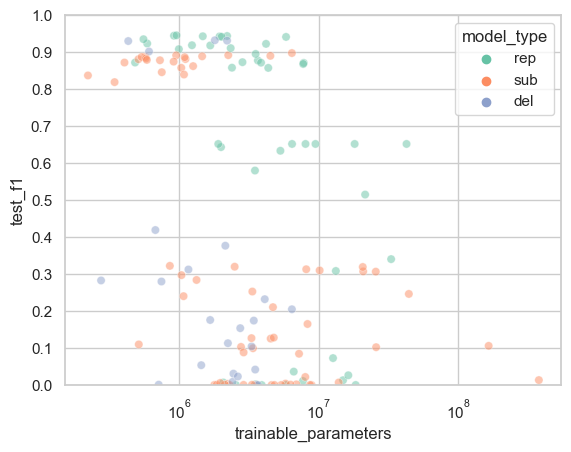

In [27]:
# Plot the trainable_parameters vs f1 scores for the rep_df, limit the test_f1 to 0 and 1, with ticks every 0.1
sns.scatterplot(data=wandb_df, x="trainable_parameters", y="test_f1", palette="Set2", hue='model_type', alpha=0.5)
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(0, 11)])

# Do the x-axis in log scale
plt.xscale("log")

plt.show()

<AxesSubplot: xlabel='trainable_parameters', ylabel='test_f1'>

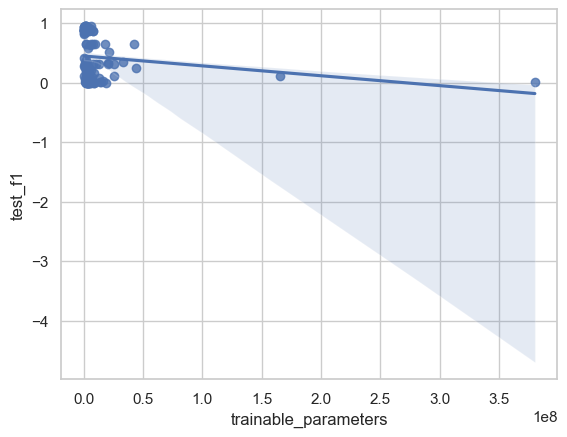

In [38]:
# Regplot the trainable_parameters vs f1 scores for the rep_df, limit the test_f1 to 0 and 1, with ticks every 0.1
sns.regplot(data=wandb_df, x="trainable_parameters", y="test_f1", scatter=True)

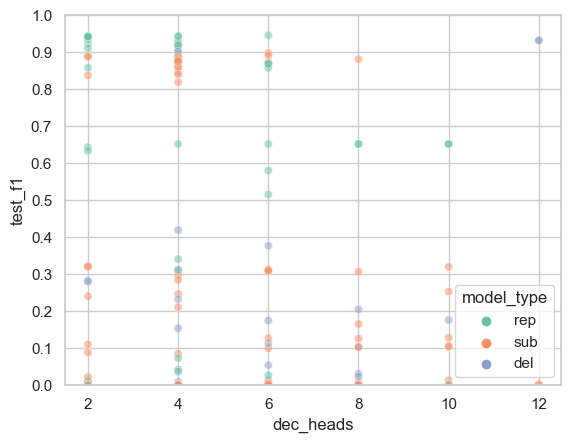

In [34]:
# Plot the trainable_parameters vs f1 scores for the rep_df, limit the test_f1 to 0 and 1, with ticks every 0.1
sns.scatterplot(data=wandb_df, x="dec_heads", y="test_f1", palette="Set2", hue='model_type', alpha=0.5)
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(0, 11)])

plt.show()